In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_squared_error, 
    mean_absolute_error,  
    r2_score,  
    mean_squared_error 
)
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
df = pd.read_csv('smogn.csv')

x = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [9]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50,100,200,300],
    'max_depth': [10,15,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'max_features': ['log2', 0.3],
    'bootstrap': [True]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(f'Melhores parâmetros: {grid_search.best_params_}')
print(f'Melhor score (CV): {grid_search.best_score_:.4f}')

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Melhores parâmetros: {'bootstrap': True, 'max_depth': 20, 'max_features': 0.3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Melhor score (CV): 0.7374


In [12]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2}")

MAE: 1.58
MSE: 4.56
RMSE: 2.14
R²: 0.792563185026083


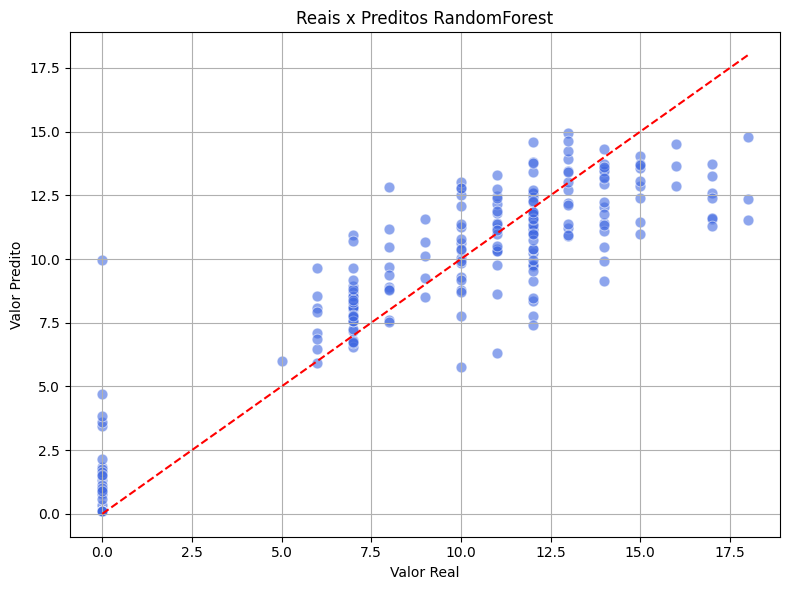

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, s=60, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.title('Reais x Preditos RandomForest')
plt.grid(True)
plt.tight_layout()
plt.show()

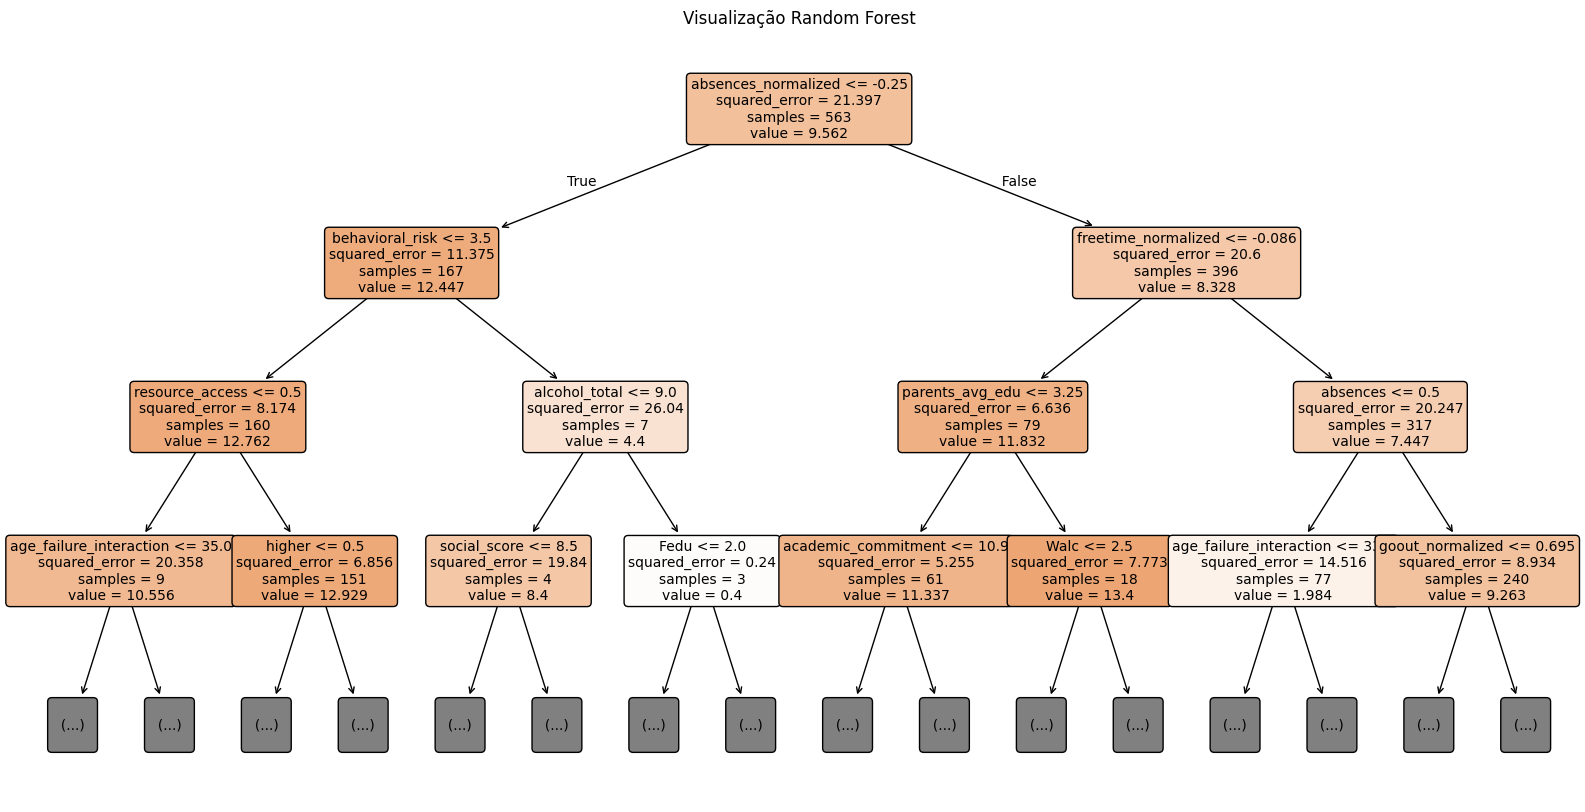

In [15]:
from sklearn.tree import plot_tree

tree_estimator = best_model.estimators_[0]

plt.figure(figsize=(20, 10))

plot_tree(
    tree_estimator,
    feature_names=x.columns,
    filled=True,
    rounded=True,
    max_depth=3, 
    fontsize=10
)

plt.title("Visualização Random Forest")
plt.show()

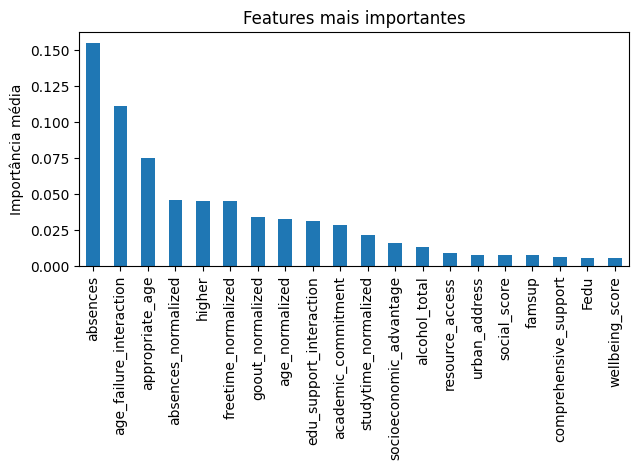

In [18]:
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

importances = pd.Series(result.importances_mean, index=X_test.columns)

top_20_importances = importances.sort_values(ascending=False).head(20)

top_20_importances.plot(kind='bar', title='Features mais importantes')
plt.ylabel('Importância média')
plt.tight_layout()
plt.show()